In [1]:
#import necessary libraries
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from datetime import datetime

Seasonal-Trend Decomposition using LOESS (STL)

In [13]:
#create a date time parser function
def parser(x):
    return datetime.strptime(x, '%Y-%m')

In [18]:
#read the data
ice_cream_data = pd.read_csv('data/ice_cream_interest.csv', header = 0, index_col = 0, parse_dates = [0], date_parser = parser)
#set the month to be the index
# ice_cream_data.set_index('month', inplace=True)
#infer the frequency of the data
ice_cream_data = ice_cream_data.asfreq(pd.infer_freq(ice_cream_data.index))
# ice_cream_data.index.freq = ice_cream_data.index.inferred_freq

In [19]:
ice_cream_data.head()

,interest
month,
2004-01-01,13
2004-02-01,15
2004-03-01,17
2004-04-01,19
2004-05-01,22


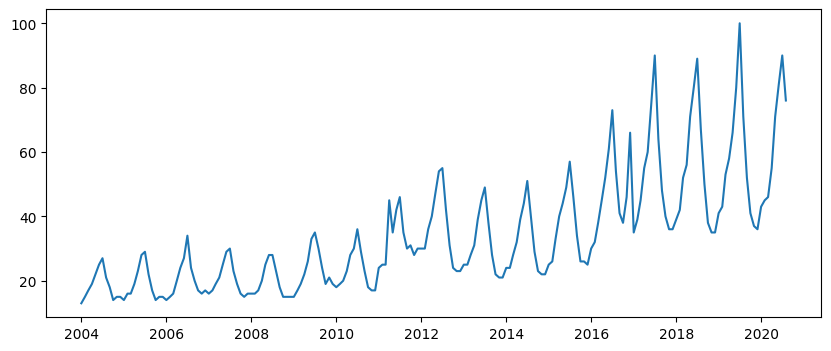

In [20]:
#plot the data
plt.figure(figsize=(10, 4))
plt.plot(ice_cream_data)

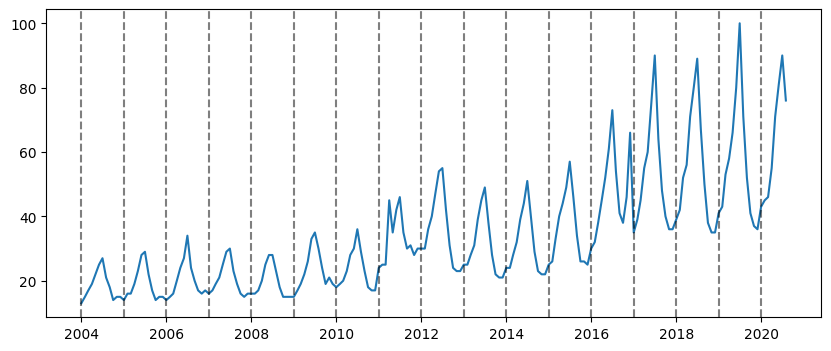

In [22]:
#plot the data with yearly demarkation
plt.figure(figsize=(10, 4))
plt.plot(ice_cream_data)
#iterate through the years and plot a vertical line
for year in range(2004, 2021):
    plt.axvline(datetime(year, 1, 1), color = 'k', linestyle = '--', alpha = 0.5)

Inspect Mid 2011 and late 2016 due to the obvious irregularity in the data plot

In [25]:
#perform the seasonal trend decomposition
stl = STL(ice_cream_data)
result = stl.fit()

In [26]:
#assign the results to variables: trend, seasonal, and residual
seasonal, trend, residual = result.seasonal, result.trend, result.resid

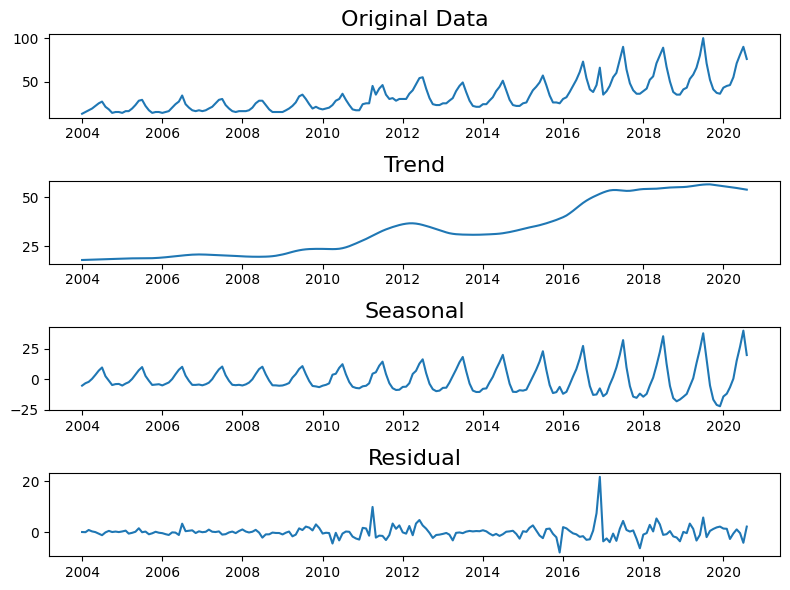

In [27]:
#plot all the components
plt.figure(figsize=(8, 6))

#plot within a subplot

#set the plot position
plt.subplot(4, 1, 1)
#plot the original data
plt.plot(ice_cream_data)
#set the title
plt.title('Original Data', fontsize = 16)

#plot the trend
plt.subplot(4, 1, 2)
plt.plot(trend)
plt.title('Trend', fontsize = 16)

#plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize = 16)

#plot the residual
plt.subplot(4, 1, 4)
plt.plot(residual)
plt.title('Residual', fontsize = 16)

plt.tight_layout()

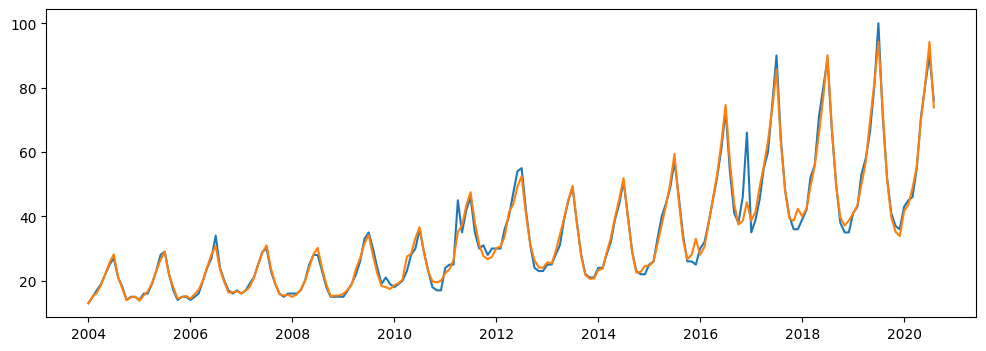

In [28]:
#do a superimposed plot  of original and estimates
estimated = seasonal + trend
plt.figure(figsize=(12, 4))
plt.plot(ice_cream_data)
plt.plot(estimated)

Anomaly Detection using STL

In [31]:
#asign the limits to variables
resid_mu = residual.mean()
resid_dev = residual.std()

lower = resid_mu - 3 * resid_dev
upper = resid_mu + 3 * resid_dev

(12296.0, 18962.0)

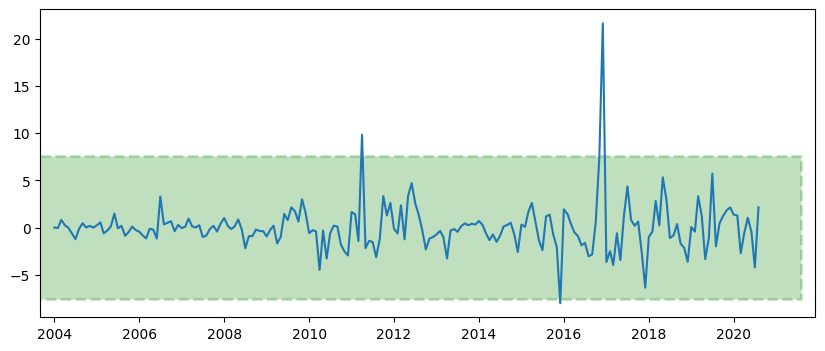

In [34]:
#plot the original data and limits to check for anomalies
plt.figure(figsize=(10, 4))
plt.plot(residual)

#plot the limits
plt.fill_between([datetime(2003,1,1), datetime(2021,8,1)], lower, upper, color = 'g', alpha = 0.25, linestyle = '--',linewidth = 2, label = 'Anomaly')
plt.xlim(datetime(2003,9,1), datetime(2021,12,1))

In [35]:
#assign the limits to variables
anomalies = ice_cream_data[(residual < lower) | (residual > upper)]

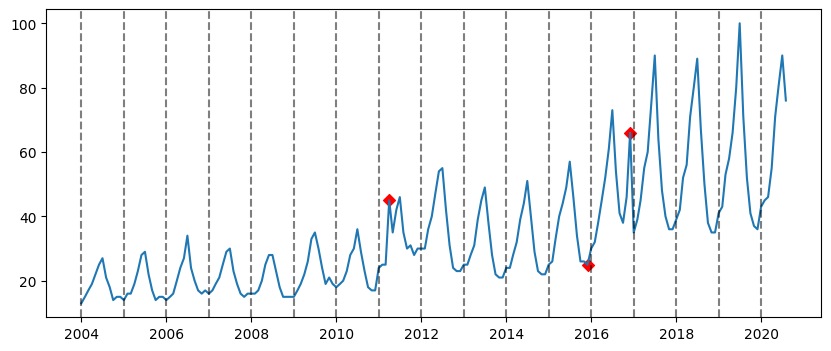

In [36]:
#plot the anomalies
plt.figure(figsize=(10, 4))
plt.plot(ice_cream_data)

#iterative through the anomalies and plot a vertical line
for year in range(2004, 2021):
    plt.axvline(datetime(year, 1, 1), color = 'k', linestyle = '--', alpha = 0.5)

#plot the anomalies
plt.scatter(anomalies.index, anomalies.interest, color = 'r', marker = 'D', label = 'Anomaly')

In [37]:
anomalies

,interest
month,
2011-04-01,45
2015-12-01,25
2016-12-01,66
